##  Homework 9

<br>



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import imageio
import scipy.fftpack as ft

1.  Apply a low-pass filter to the USAF1951w.jpg image using a circular mask of 50 pixels in radius centered on the window.  What differences are created as compared to the 10 pixel radius used in class?<br><br>

In [ ]:
#  low pass filter
def Circle(size, loc, rad):
    """frame, center, radius size is (v,h) of size of array loc is (v,h) of circle location
    rad is integer of radius returns array with a solid circle"""
    b1, b2 = np.indices(size)
    b1, b2 = b1-loc[0], b2-loc[1]
    mask = b1 * b1 + b2 * b2
    mask = (mask <= rad * rad).astype(int)
    return mask

<ipython-input-3-fb3362d8350c>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url, mode='F')



Shape of Tests Image (2260, 2315)


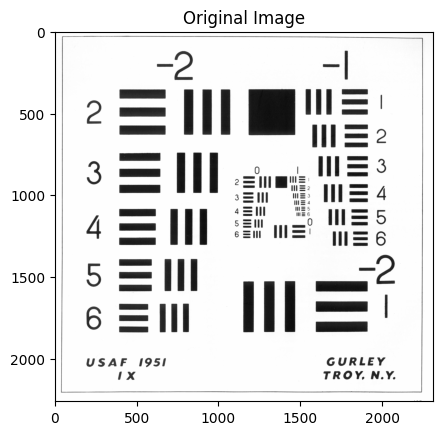

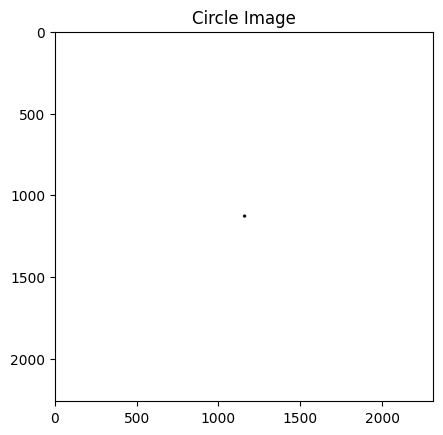

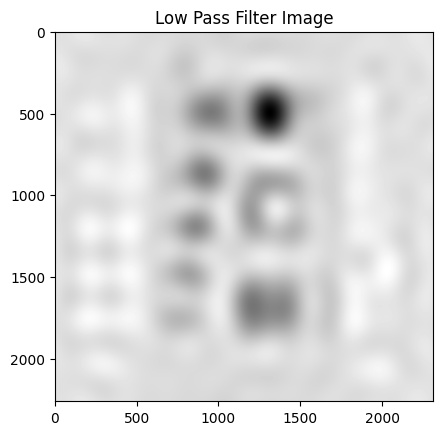

In [ ]:
#In class example circle mask radius = 10

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/USAF1951w.jpg'
amg = imageio.imread(url, mode='F')

print('\nShape of Tests Image', amg.shape)
plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

bmg = 1 - amg/amg.max()                   #  reverses the bright and dark pixels
cmg = ft.fftshift(ft.fft2(bmg))           #  compute Fourier Transform

V, H = cmg.shape                          #  obtain the image shape
circ = Circle((V,H), (V/2,H/2), 10)       #  create the mask
plt.title('Circle Image')
plt.imshow(-circ, cmap='gray')
plt.show()

dmg = ft.ifft2(ft.fftshift(circ * cmg))   #  compute the inverse FFT of the mask multiplied by the previous FFT

plt.title('Low Pass Filter Image')
plt.imshow(dmg.real, cmap='gray')
plt.show()

rad_10 = dmg

<ipython-input-4-c159517e8998>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url, mode='F')



Shape of Tests Image (2260, 2315)


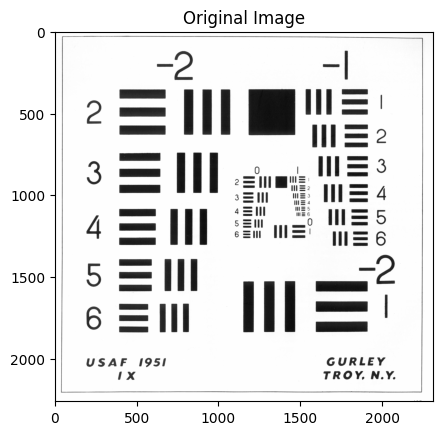

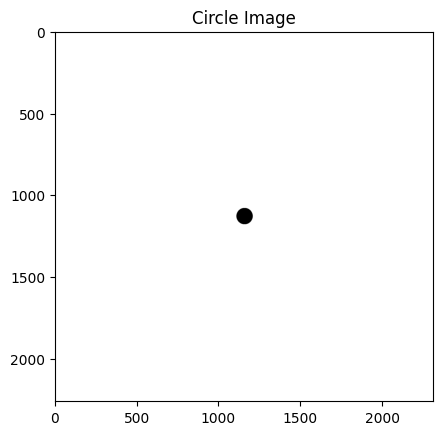

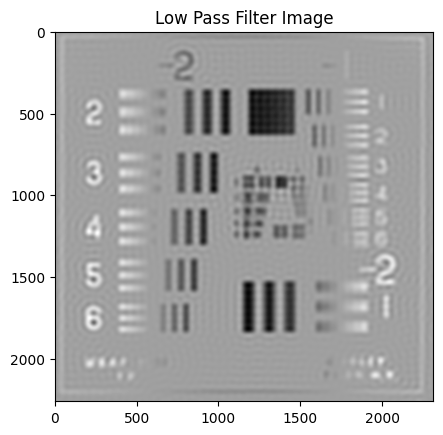

In [ ]:
#Homework example circle mask radius = 50

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/USAF1951w.jpg'
amg = imageio.imread(url, mode='F')

print('\nShape of Tests Image', amg.shape)
plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

bmg = 1 - amg/amg.max()                   #  reverses the bright and dark pixels
cmg = ft.fftshift(ft.fft2(bmg))           #  compute Fourier Transform

V, H = cmg.shape                          #  obtain the image shape
circ = Circle((V,H), (V/2,H/2), 50)       #  create the mask
plt.title('Circle Image')
plt.imshow(-circ, cmap='gray')
plt.show()

dmg = ft.ifft2(ft.fftshift(circ * cmg))   #  compute the inverse FFT of the mask multiplied by the previous FFT

plt.title('Low Pass Filter Image')
plt.imshow(dmg.real, cmap='gray')
plt.show()

In [ ]:
'''fig, axs = plt.subplots(1, 2)
axs[0].imshow(rad_10.real, cmap='gray')
axs[0].set_title('Inclass example rad = 10')
axs[1].imshow(dmg.real,cmap='gray')
axs[0].set_title('Homework problem rad = 50')'''

"fig, axs = plt.subplots(1, 2)\naxs[0].imshow(rad_10.real, cmap='gray')\naxs[0].set_title('Inclass example rad = 10')\naxs[1].imshow(dmg.real,cmap='gray')\naxs[0].set_title('Homework problem rad = 50')"

A low pass filter should block out the higher frequency data, so it should smooth out an image like shown when the radius = 10 in the in class example. But in the homework, I think since the mask is larger in area, it is letting in more higher frequencies, leading towards the resulting image not having as much of a bluring effect. From testing, it appears the smaller the radius of the mask, the more intense the bluring is and the larger the radius of the circle mask the less the bluring is. The color almost seems inverted, as the color of the numbers and some of the symbols turn white, but only on the left and right sides and the background becomes gray instead of white like the original image or the resulting image from the inclass example; this behavior of a color inversion on the left and right sides seems to be because of the where we inverse the intensity. Perhaps because we filtered out much of the high frequency when the radius = 10, the affects of color inversion were less clear than when the radius = 50.

2.  Use a bandpass filter on the USAF1951w.jpg image with r1 = 32 and r2 = 64 centered on the window.  Describe your results.<br><br>



<ipython-input-6-bb144fe96b88>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url, mode='F')


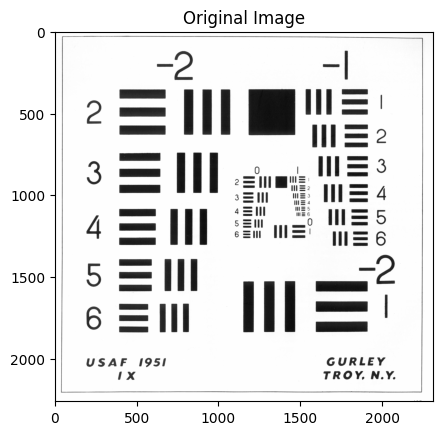

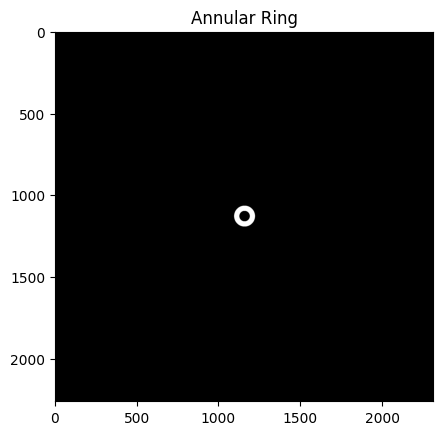

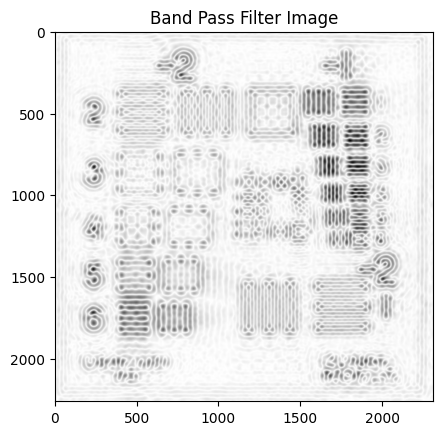

In [ ]:
#bandpass filter where r1=32
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/USAF1951w.jpg'
amg = imageio.imread(url, mode='F')

#  band pass filter
plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

#  create the annular ring
circ1 = Circle((V,H), (V/2,H/2), 32) #r1
circ2 = Circle((V,H), (V/2,H/2), 64) #r2
circ = circ2 - circ1

plt.title('Annular Ring')
plt.imshow(circ, cmap='gray')
plt.show()

cmg = ft.fftshift(ft.fft2(amg))           #  compute Fourier Transform
dmg = ft.ifft2(ft.fftshift(circ*cmg))

plt.title('Band Pass Filter Image')
plt.imshow(-abs(dmg), cmap='gray')
plt.show()

<ipython-input-7-5f5a264cc3bd>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url, mode='F')


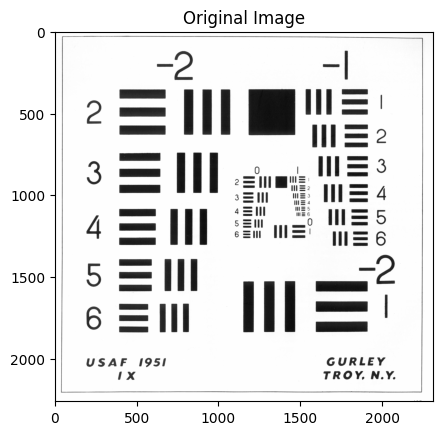

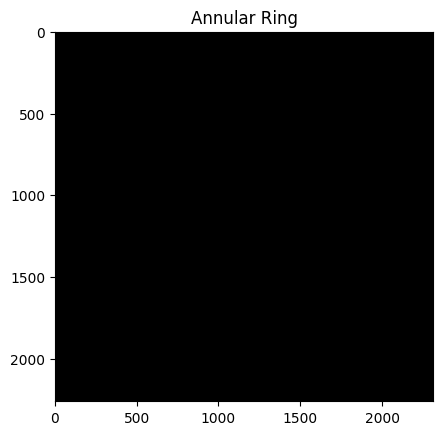

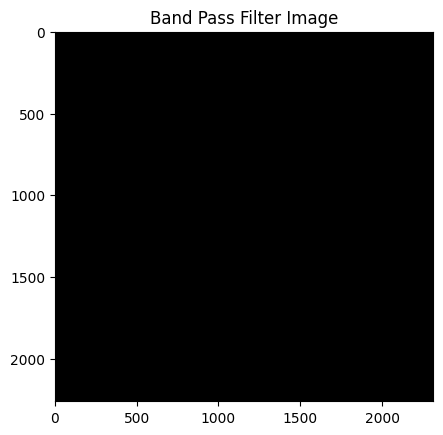

In [ ]:
#bandpass filter where r1=64
url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/USAF1951w.jpg'
amg = imageio.imread(url, mode='F')

#  band pass filter
plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

#  create the annular ring
circ1 = Circle((V,H), (V/2,H/2), 64) #r1
circ2 = Circle((V,H), (V/2,H/2), 64) #r2
circ = circ2 - circ1

plt.title('Annular Ring')
plt.imshow(circ, cmap='gray')
plt.show()

cmg = ft.fftshift(ft.fft2(amg))           #  compute Fourier Transform
dmg = ft.ifft2(ft.fftshift(circ*cmg))

plt.title('Band Pass Filter Image')
plt.imshow(-abs(dmg), cmap='gray')
plt.show()

It seems when r1 = 32, the resulting image from the band pass filter looks similar to the in class example but with less spider webbing, and a more clear kalediscope looking pattern. Interestingly when r = 32 and you look maybe 3 to 5 feet away from the screen, it almost looks like we've found the edges. When r1 = 64 and r2 = 64, we return a matrix of zeros, multipling the image with a blank image returns a blank image, so when r1 = 64 we get a blank image.

3. Use the Smooth Edge code with an inner circle of 32 pixels and the outer circle of 64 pixels to smooth the edges of the USAF1951w.jpg image with a maximum filter of size 10 and then a minimun filter of size 10 centered on the image.  Describe the differences.<br><br>


<ipython-input-8-048cd71c350f>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url, mode='F')


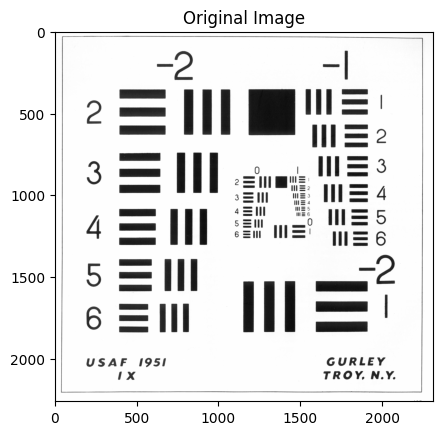

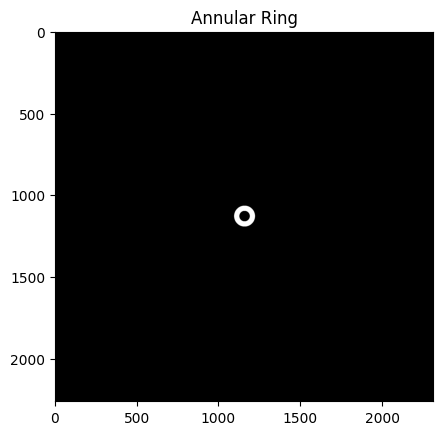

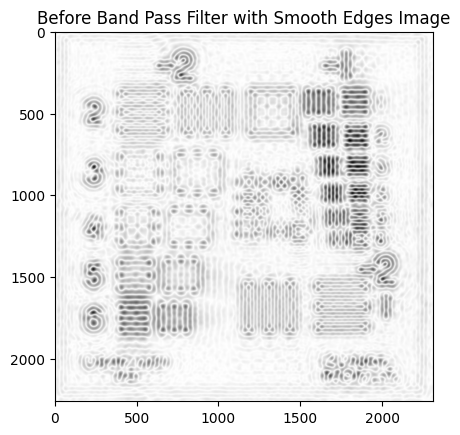

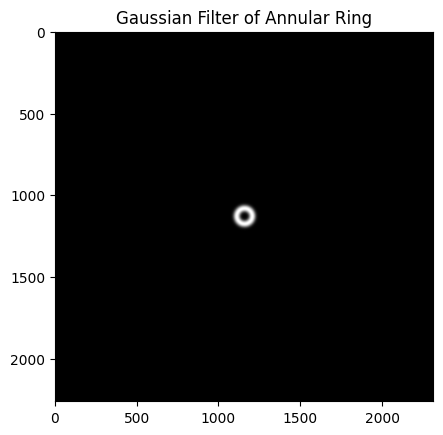

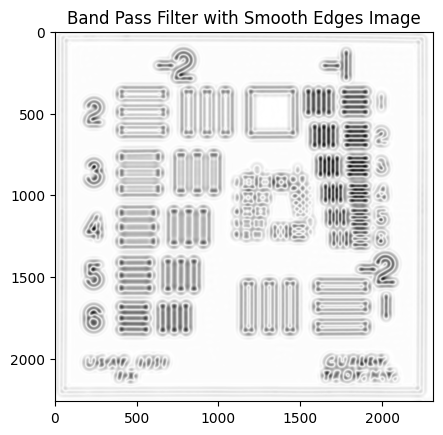

In [ ]:
#In class example nd.gaussian_filter sigma = 10

import scipy.ndimage as nd

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/USAF1951w.jpg'
amg = imageio.imread(url, mode='F')

plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

V, H = amg.shape
circ1 = Circle((V,H), (V/2,H/2), 32) # r1
circ2 = Circle((V,H), (V/2,H/2), 64) # r2
circ = circ2 - circ1
plt.title('Annular Ring')
plt.imshow(circ, cmap='gray')
plt.show()

ddmg = ft.ifft2(ft.fftshift(circ*cmg))
plt.title('Before Band Pass Filter with Smooth Edges Image')
plt.imshow(-abs(ddmg), cmap='gray')
plt.show()

circ = nd.gaussian_filter(circ+0.0, 10)
plt.title('Gaussian Filter of Annular Ring')
plt.imshow(circ, cmap='gray')
plt.show()

dmg = ft.ifft2(ft.fftshift(circ*cmg))

plt.title('Band Pass Filter with Smooth Edges Image')
plt.imshow(-abs(dmg), cmap='gray')
plt.show()
gaus10 = -abs(dmg)

<ipython-input-9-624d13c9677c>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url, mode='F')


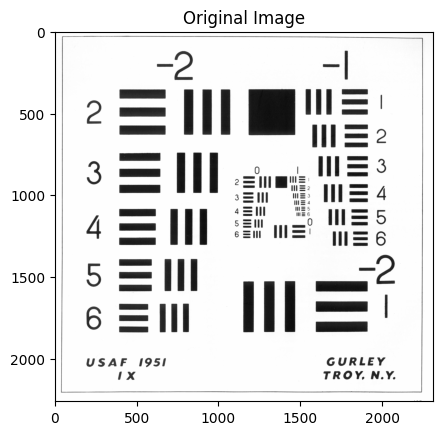

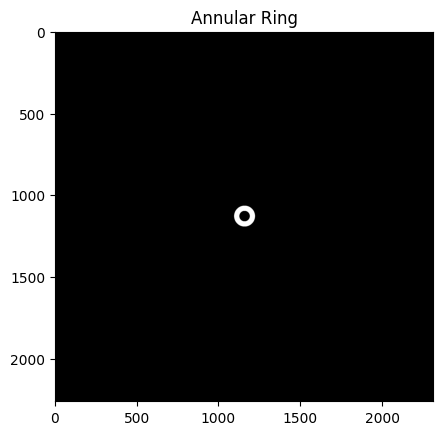

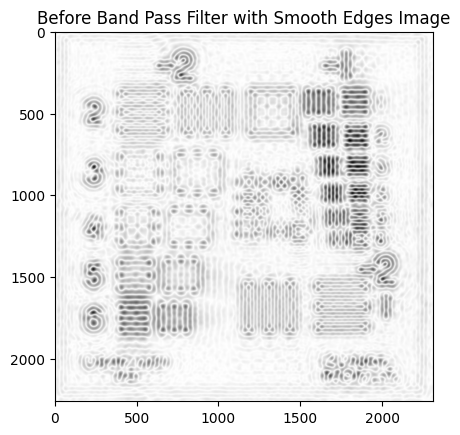

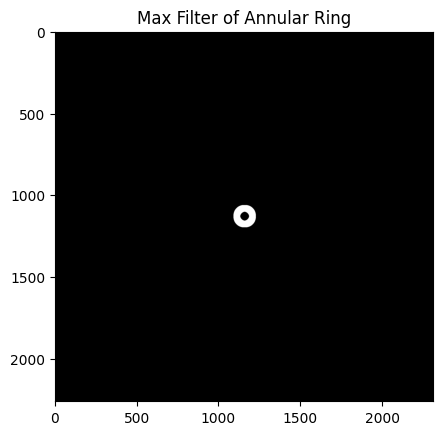

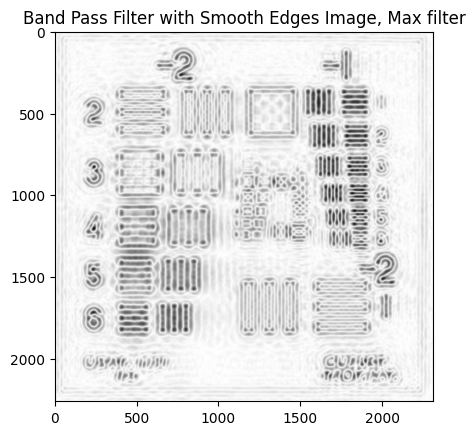

In [ ]:
#maximum filter of size 10

import scipy.ndimage as nd

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/USAF1951w.jpg'
amg = imageio.imread(url, mode='F')

plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

V, H = amg.shape
circ1 = Circle((V,H), (V/2,H/2), 32) # r1
circ2 = Circle((V,H), (V/2,H/2), 64) # r2
circ = circ2 - circ1
plt.title('Annular Ring')
plt.imshow(circ, cmap='gray')
plt.show()

ddmg = ft.ifft2(ft.fftshift(circ*cmg))
plt.title('Before Band Pass Filter with Smooth Edges Image')
plt.imshow(-abs(ddmg), cmap='gray')
plt.show()

circ = nd.maximum_filter(circ+0.0, 10)
plt.title('Max Filter of Annular Ring')
plt.imshow(circ, cmap='gray')
plt.show()

dmg = ft.ifft2(ft.fftshift(circ*cmg))

plt.title('Band Pass Filter with Smooth Edges Image, Max filter')
plt.imshow(-abs(dmg), cmap='gray')
plt.show()

In [ ]:
max10 = -abs(dmg)

<ipython-input-11-61ed3f6145d3>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  amg = imageio.imread(url, mode='F')


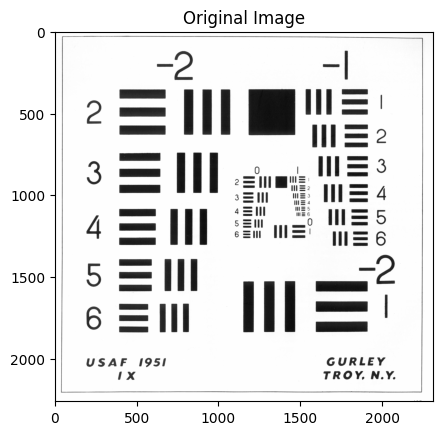

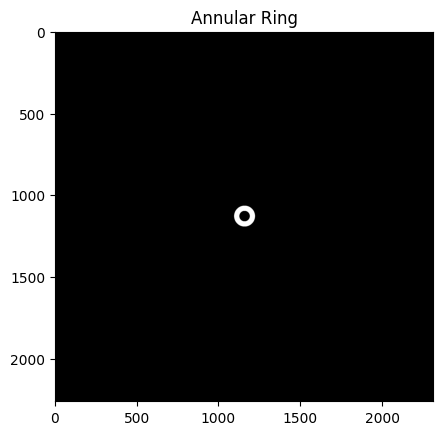

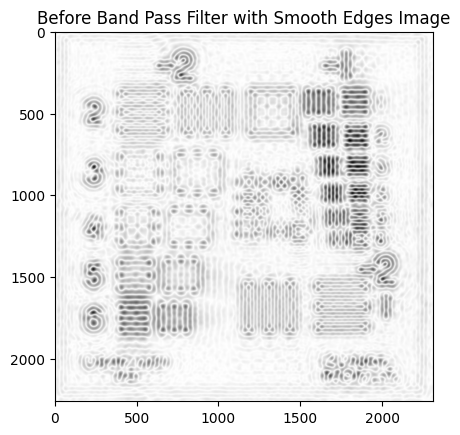

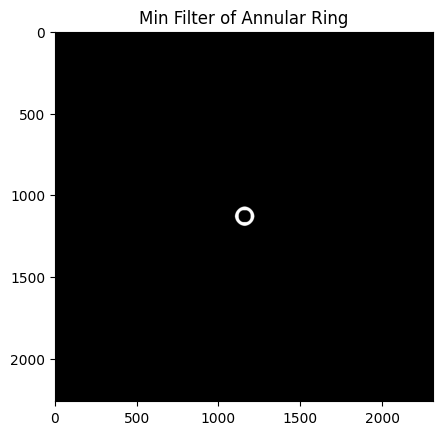

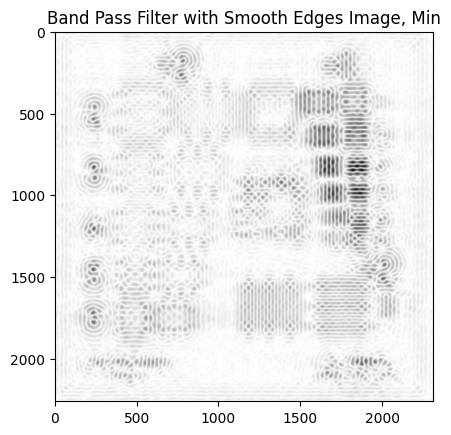

In [ ]:
#minimun filter of size 10

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/USAF1951w.jpg'
amg = imageio.imread(url, mode='F')

plt.title('Original Image')
plt.imshow(amg, cmap='gray')
plt.show()

circ1 = Circle((V,H), (V/2,H/2), 32) # r1
circ2 = Circle((V,H), (V/2,H/2), 64) # r2
circ = circ2 - circ1
plt.title('Annular Ring')
plt.imshow(circ, cmap='gray')
plt.show()

ddmg = ft.ifft2(ft.fftshift(circ*cmg))
plt.title('Before Band Pass Filter with Smooth Edges Image')
plt.imshow(-abs(ddmg), cmap='gray')
plt.show()

circ = nd.minimum_filter(circ+0.0, 10)
plt.title('Min Filter of Annular Ring')
plt.imshow(circ, cmap='gray')
plt.show()

dmg = ft.ifft2(ft.fftshift(circ*cmg))

plt.title('Band Pass Filter with Smooth Edges Image, Min')
plt.imshow(-abs(dmg), cmap='gray')
plt.show()

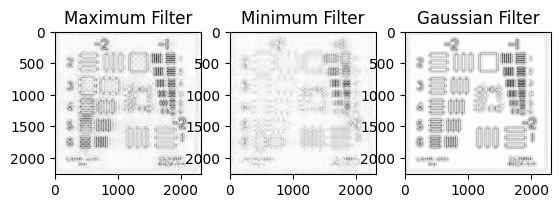

In [ ]:
min10 = -abs(dmg)

%matplotlib inline
fig, axs = plt.subplots(1, 3)
axs[0].imshow(max10, cmap='gray')
axs[0].set_title('Maximum Filter')
axs[1].imshow(min10,cmap='gray')
axs[1].set_title('Minimum Filter')
axs[2].imshow(gaus10,cmap='gray')
axs[2].set_title('Gaussian Filter')
plt.show()

It seems that the gaussian filter looks like a combination of the max and min filters, except both the max and min filters had residual artifacts like the spider webbing found in the band pass filter example where the annular ring was not smoothed out. It seems like the max filter makes the central circle (r1) appear smaller and the min filter makes the central circle appear bigger comparing this behavior to the gausian filter where, the whole ring appeared to just be gaussian blurred. It seems like the max filter was still able to sus out most of the edges, when the min filter was not. It seems like the adding the max filter almost acts as a high pass filter and vice versa with the min filter?


4.  Using the lines.png file, create a wedge filter to eliminate the other set of parallel lines (the ones moving from the top left to the bottom right).<br><br>

<ipython-input-13-31c141e42e68>:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  adata = imageio.imread(url, mode='F').astype(np.uint8)


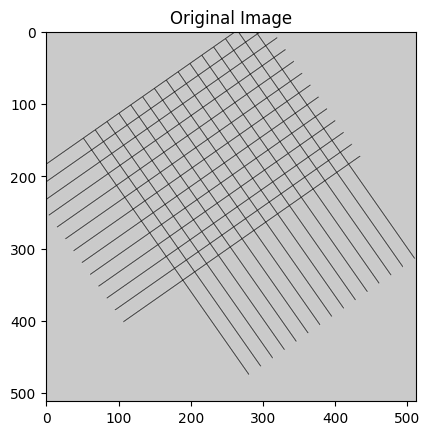

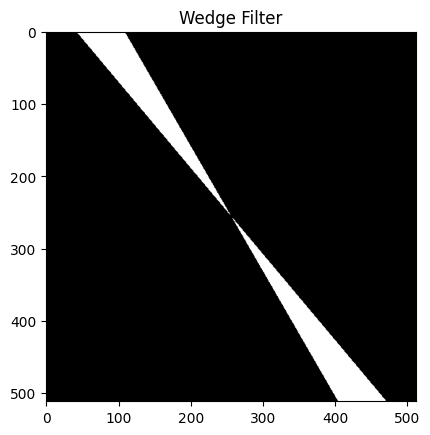

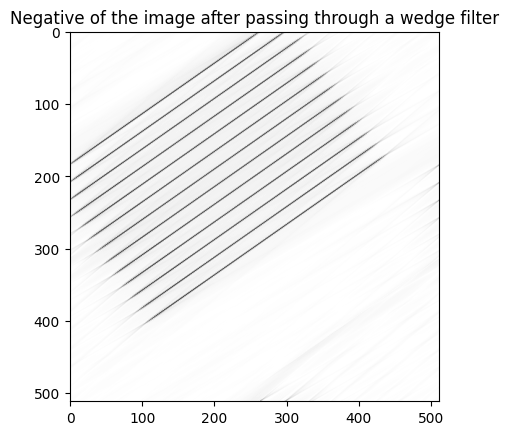

In [ ]:
def Wedge(vh, t1, t2):
    ans = np.zeros(vh)
    ndx = np.indices(vh).astype(float)
    ndx[0] = ndx[0] - vh[0]/2
    ndx[1] = ndx[1] - vh[1]/2
    mask = ndx[0] == 0
    ndx[0] = (1-mask)*ndx[0] + mask*1e-10
    ans =  np.arctan(  ndx[1]  / ndx[0]  )
    ans = ans + np.pi/2
    mask = ans >= t1/180.* np.pi
    mask2 = ans < t2/180.* np.pi
    mask = np.logical_and( mask, mask2).astype(int)
    V,H = vh
    mask[V//2, H//2] = 0
    return mask

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/lines.png'
adata = imageio.imread(url, mode='F').astype(np.uint8)

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

ddata = ft.fftshift(ft.fft2(adata))
V,H = adata.shape

mdata = Wedge((V,H), 120, 130)
plt.title('Wedge Filter')
plt.imshow(mdata, cmap='gray')
plt.show()

bdata = ft.ifft2(ft.fftshift (ddata * mdata))

plt.title('Negative of the image after passing through a wedge filter')
plt.imshow(-abs(bdata), cmap='gray')
plt.show()